<a href="https://colab.research.google.com/github/fisicadeparticulas/20210915_procesamientodearchivoslhe-AlejRamos/blob/main/C%C3%B3digoCompleto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

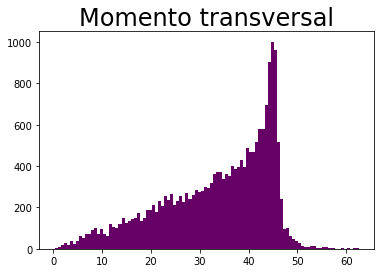

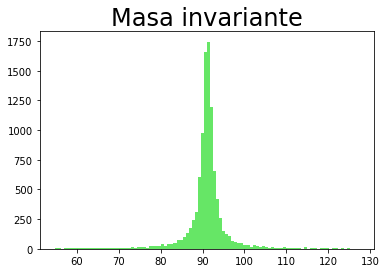

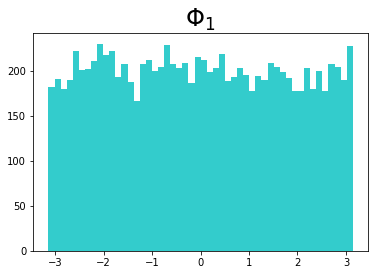

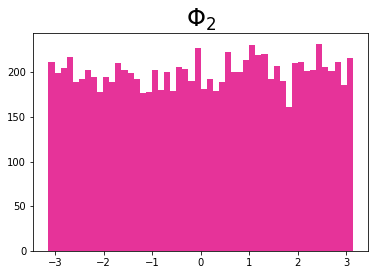

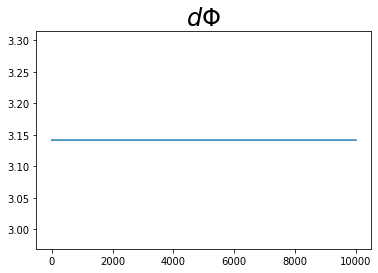

(array([  3.,   0.,   4.,   8.,   8.,  14.,  37.,  53.,  94., 137., 211.,
        284., 368., 458., 522., 620., 667., 704., 754., 744., 834., 795.,
        844., 812., 835., 788., 823., 815., 828., 817., 796., 833., 732.,
        735., 638., 602., 473., 394., 306., 225., 157.,  92.,  58.,  35.,
         22.,  13.,   6.,   1.,   0.,   1.]),
 array([-7.89445182, -7.58024788, -7.26604394, -6.95183999, -6.63763605,
        -6.32343211, -6.00922817, -5.69502423, -5.38082028, -5.06661634,
        -4.7524124 , -4.43820846, -4.12400452, -3.80980057, -3.49559663,
        -3.18139269, -2.86718875, -2.55298481, -2.23878086, -1.92457692,
        -1.61037298, -1.29616904, -0.9819651 , -0.66776115, -0.35355721,
        -0.03935327,  0.27485067,  0.58905461,  0.90325856,  1.2174625 ,
         1.53166644,  1.84587038,  2.16007432,  2.47427827,  2.78848221,
         3.10268615,  3.41689009,  3.73109403,  4.04529797,  4.35950192,
         4.67370586,  4.9879098 ,  5.30211374,  5.61631768,  5.93052163,
 

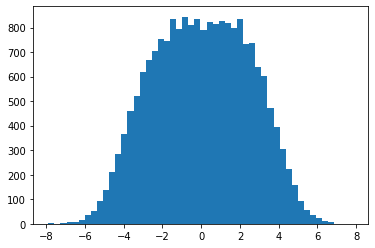

In [8]:
"""
Archivo que grafica la masa invariante muon-muon
Creado por Alejandro Ramos
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


#events = pd.read_csv("https://cernbox.cern.ch/index.php/s/5n2wG7OD7a0wYXX/download")
#events.head()

datos = np.genfromtxt("https://cernbox.cern.ch/index.php/s/5n2wG7OD7a0wYXX/download", delimiter=",",
                      names=["px","py","pz","E"])
p_t = np.sqrt((datos["px"]**2)+(datos["py"]**2))

plt.figure()
plt.hist(p_t,100,color=(0.4,0.0,0.4))
plt.title("Momento transversal",fontsize=24)
plt.show()

a = len(datos)
b=int((a+1)/2)
#print(len(datos))

"""
En las siguientes lineas esta el codigo donde se crea una matriz
con los datos por evento de los momentos y la energia
su estrucutra es:
evento px_1 py_1 pz_1 E_1 px_2 py_2 pz_2 E_2
Con 1 correspondiente al muon negativo y 2 el positivo
"""
H = []
j = []
L = []
M2 = []
for i in range(b):
    j = (i,datos[i*2][0],datos[i*2][1],datos[i*2][2],datos[i*2][3],
        datos[i*2+1][0],datos[i*2+1][1],datos[i*2+1][2],datos[i*2+1][3])
    H.append(j)
    E2 = (H[i][4]+H[i][8])**2
    P2 = (H[i][1]+H[i][5])**2 + (H[i][2]+H[i][6])**2 +(H[i][3]+H[i][7])**2
    L = E2 - P2
    M2.append(L)

# np.savetxt("Hcito.txt", H, 
#             fmt=["%.0f","%.5f","%.5f","%.5f","%.5f","%.5f","%.5f","%.5f","%.5f"],
#             header="event  px1  py1  pz1  E1  px2 py2  pz2  E2")

plt.figure()
plt.hist(np.sqrt(M2), 100, color=(0.4,0.9,0.4))
plt.title("Masa invariante",fontsize=24)
plt.show()


"""
Vamos a graficar el angulo phi
"""
Dphi=[]
l=[]
P_t1=[] #Definimos un vector que llevara el momento transversal 1
P_t2=[] #Definimos un vector que llevara el momento transversal 2
phi=[] #Valores de phi1 usando el arccos
phi2=[] #Valores de phi2 usando el arccos
Phi=[] #construir un vector con los valores del primer phi1
Phi2=[] #construir un vector con los valores del segundo phi2

for i in range(len(H)):
  #P_t1=np.sqrt((H[i][1])**2+H[i][2]**2)
  #P_t2=np.sqrt((H[i][5])**2+H[i][6]**2)
  if H[i][2]>0:
    #phi=np.arccos(H[i][1]/np.sqrt((H[i][1])**2+H[i][2]**2))
    Phi.append(np.arccos(H[i][1]/np.sqrt((H[i][1])**2+H[i][2]**2)))
  else: 
    #phi=np.arccos(-H[i][1]/np.sqrt((H[i][1])**2+H[i][2]**2))
    Phi.append(-np.arccos(H[i][1]/np.sqrt((H[i][1])**2+H[i][2]**2)))
  if H[i][6]>0:
    #phi2=np.arccos(H[i][5]/np.sqrt((H[i][5])**2+H[i][6]**2))
    Phi2.append(np.arccos(H[i][5]/np.sqrt((H[i][5])**2+H[i][6]**2)))
  else: 
    #phi2=np.arccos(-H[i][5]/np.sqrt((H[i][5])**2+H[i][6]**2))
    Phi2.append(-np.arccos(H[i][5]/np.sqrt((H[i][5])**2+H[i][6]**2)))
  #l=phi2-phi
  Dphi.append(abs(Phi[i]-Phi2[i]))
  
  

#Grafico phi usando arccos
plt.figure()
plt.hist(Phi,50,color=(0.2,0.8,0.8))
plt.title(r"$\Phi_1$",fontsize=24)
plt.show()

plt.figure()
plt.hist(Phi2,50,color=(0.9,0.2,0.6))
plt.title(r"$\Phi_2$",fontsize=24)
plt.show()

plt.figure()
plt.plot(Dphi)
plt.title(r"$d\Phi$",fontsize=24)
plt.show()

#fig = px.histogram(Dphi,x=Dphi[:],range_x=[3.12,3.17])
#fig.update_layout(
#    title=r"$ \text{ Distribucion de }  \Delta \phi $",
#    xaxis_title="$\Delta \phi_{\mu^+\mu^-}$ [Radianes]",
#    yaxis_title="Eventos")
#fig.show()


"""
Calcularé theta  y la pseudorapidez
"""

theta = np.arccos(datos["pz"]/(np.sqrt(p_t**2+datos["pz"]**2)))

Pr = -np.log(np.tan(theta/2))
plt.hist(Pr,50)

